<a href="https://colab.research.google.com/github/InsightByHarshit/Loan-Data-Analysis/blob/main/Loan_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv('loan_data.csv')

In [ ]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1,INDIVIDUAL,NaN,NaN,0,NaN,0.0,0,0.0,0.0


In [ ]:
data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,1,INDIVIDUAL,NaN,NaN,0,NaN,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,1,INDIVIDUAL,NaN,NaN,0,NaN,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,1,INDIVIDUAL,NaN,NaN,0,NaN,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,1,INDIVIDUAL,NaN,NaN,0,NaN,NaN,0,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,1,INDIVIDUAL,NaN,NaN,0,NaN,NaN,0,NaN,NaN


In [ ]:
data.shape

(39717, 55)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [ ]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,collections_12_mths_ex_med,policy_code,annual_inc_joint,verification_status_joint,acc_now_delinq,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39661.0,39717.0,0.0,0.0,39717.0,0.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,0.0,1.0,NaN,NaN,0.0,NaN,0.0,0.0,2.000000,0.0


In [ ]:
data.dtypes

,0
id,int64
member_id,int64
loan_amnt,int64
funded_amnt,int64
funded_amnt_inv,float64
term,object
int_rate,object
installment,float64
grade,object
sub_grade,object


# **Data Cleaning**

In [ ]:
data.isnull().sum()

,0
id,0
member_id,0
loan_amnt,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [ ]:
data.isna().sum()/len(data) * 100

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [ ]:
# droping the columns which has 100% null values
data.dropna(axis=1, how='all', inplace=True)

In [ ]:
data.shape

(39717, 52)

In [ ]:
data.isna().sum()/len(data) * 100

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [ ]:
# dropping the columns which has more than 60% null values
#also dropping desc as it is a Loan description provided by the borrower which has 36% missing values
# but we also have title column which is The loan title provided by the borrower so instead of desc we can use title
# Check if the columns exist before dropping
columns_to_drop = ['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc']
existing_columns = [col for col in columns_to_drop if col in data.columns]

data.drop(columns=existing_columns, inplace=True)

In [ ]:
data.shape

(39717, 49)

In [ ]:
data.isna().sum()/len(data) * 100

,0
id,0.000000
member_id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000


In [ ]:
# since we have member id which is an unique number given to all borrowed member so we can drop id
# dropping url as it is a link and is of no use in analysis
# dropping 'application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'because all this column contain same data for every member
# And since similar data for every member will of no use for analysis so dropping it
data.drop(columns=['id','url','application_type','policy_code','collections_12_mths_ex_med','initial_list_status','pymnt_plan'],inplace=True)
data.shape

(39717, 42)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_id                 39717 non-null  int64  
 1   loan_amnt                 39717 non-null  int64  
 2   funded_amnt               39717 non-null  int64  
 3   funded_amnt_inv           39717 non-null  float64
 4   term                      39717 non-null  object 
 5   int_rate                  39717 non-null  object 
 6   installment               39717 non-null  float64
 7   grade                     39717 non-null  object 
 8   sub_grade                 39717 non-null  object 
 9   emp_title                 37258 non-null  object 
 10  emp_length                38642 non-null  object 
 11  home_ownership            39717 non-null  object 
 12  annual_inc                39717 non-null  float64
 13  verification_status       39717 non-null  object 
 14  loan_s

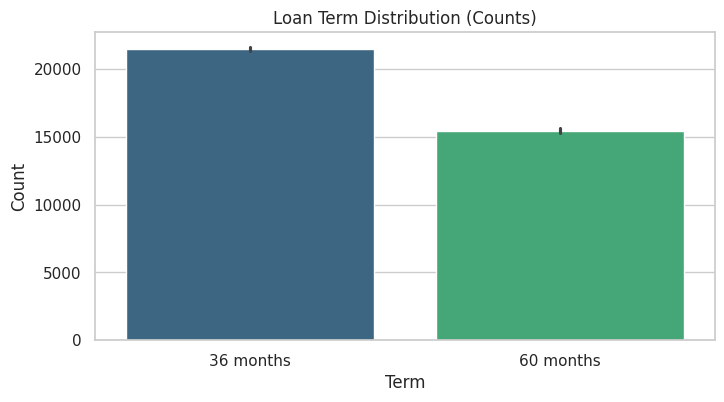

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=data['term'].values, y=data['term'].index, palette="viridis")

plt.title("Loan Term Distribution (Counts)")
plt.xlabel("Term")
plt.ylabel("Count")
plt.show()

In [ ]:
data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

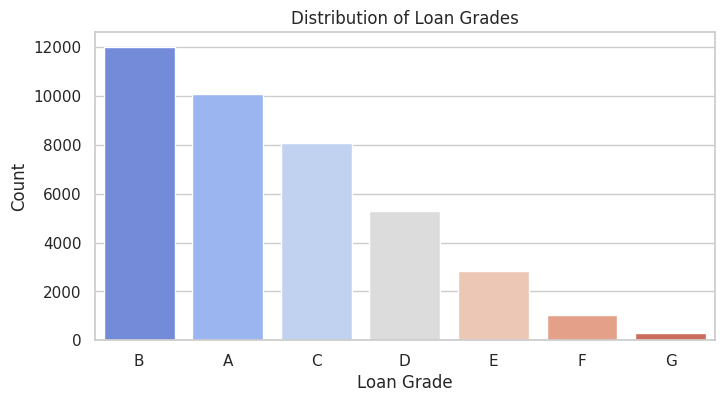

In [ ]:

# Count the occurrences of each grade
grade_counts = data['grade'].value_counts()


# Plot the bar graph
plt.figure(figsize=(8, 4))
sns.barplot(x=grade_counts.index, y=grade_counts.values, palette="coolwarm")

# Customize the plot
plt.title("Distribution of Loan Grades")
plt.xlabel("Loan Grade")
plt.ylabel("Count")


# Show the plot
plt.show()


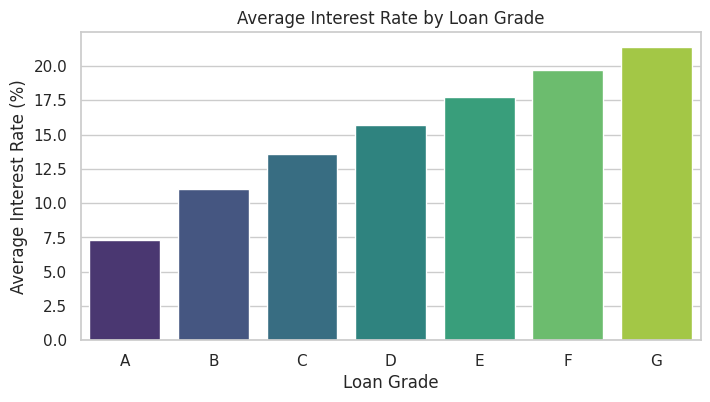

In [ ]:
# Calculate the average interest rate for each grade
data['int_rate'] = data['int_rate'].astype(str).str.rstrip('%').astype(float)


avg_interest_rate_by_grade = data.groupby('grade')['int_rate'].mean()



# Plot the bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_interest_rate_by_grade.index, y=avg_interest_rate_by_grade.values, palette="viridis")

# Customize the plot
plt.title("Average Interest Rate by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Average Interest Rate (%)")


# Show the plot
plt.show()


In [ ]:
data["purpose"].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

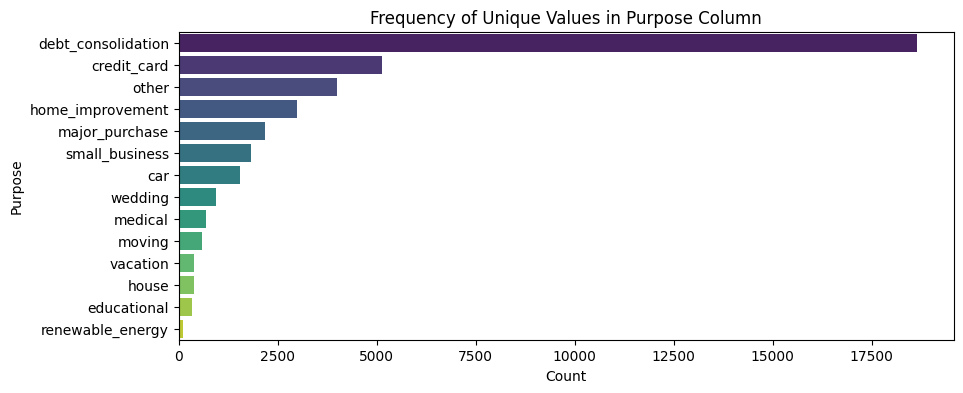

In [ ]:
purpose_counts = data["purpose"].value_counts()
plt.figure(figsize=(10, 4))
sns.barplot(x=purpose_counts.values, y=purpose_counts.index, palette="viridis")

# Add titles and labels
plt.title('Frequency of Unique Values in Purpose Column')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.xticks(rotation=0)


# Show the plot
plt.show()

In [ ]:
data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

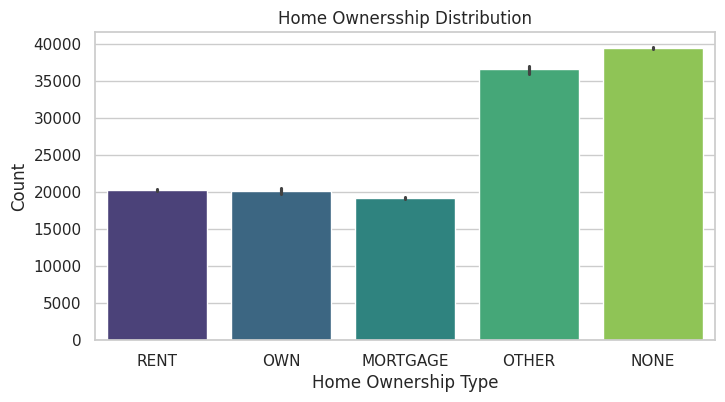

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x=data['home_ownership'].values, y=data['home_ownership'].index, palette="viridis")
plt.title("Home Ownersship Distribution")
plt.xlabel("Home Ownership Type")
plt.ylabel("Count")

plt.show()

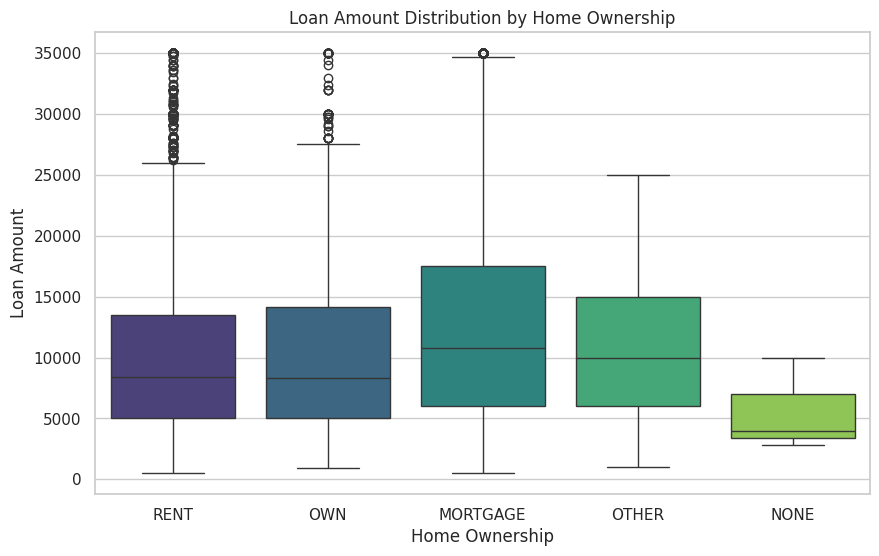

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='home_ownership', y='loan_amnt', data=data, palette='viridis')
plt.xlabel('Home Ownership')
plt.ylabel('Loan Amount')
plt.title('Loan Amount Distribution by Home Ownership')
plt.show()

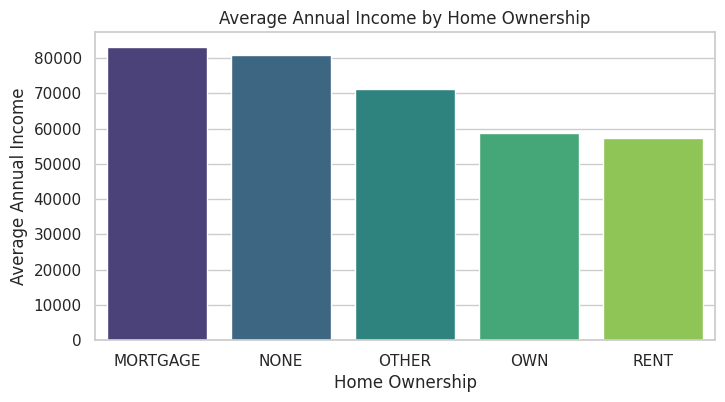

In [ ]:
avg_income_by_home_ownership = data.groupby('home_ownership')['annual_inc'].mean()

plt.figure(figsize=(8, 4))
sns.barplot(x=avg_income_by_home_ownership.index, y=avg_income_by_home_ownership.values, palette='viridis')


plt.title("Average Annual Income by Home Ownership")
plt.xlabel("Home Ownership")
plt.ylabel("Average Annual Income")



plt.show()


In [80]:
data['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

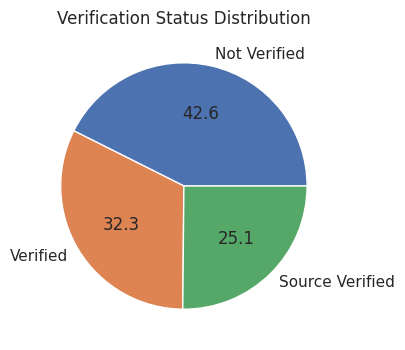

In [ ]:
verification_status_counts = data['verification_status'].value_counts()

plt.figure(figsize=(6, 4))
plt.pie(verification_status_counts, labels=verification_status_counts.index, autopct='%1.1f')

plt.title('Verification Status Distribution')

plt.show()


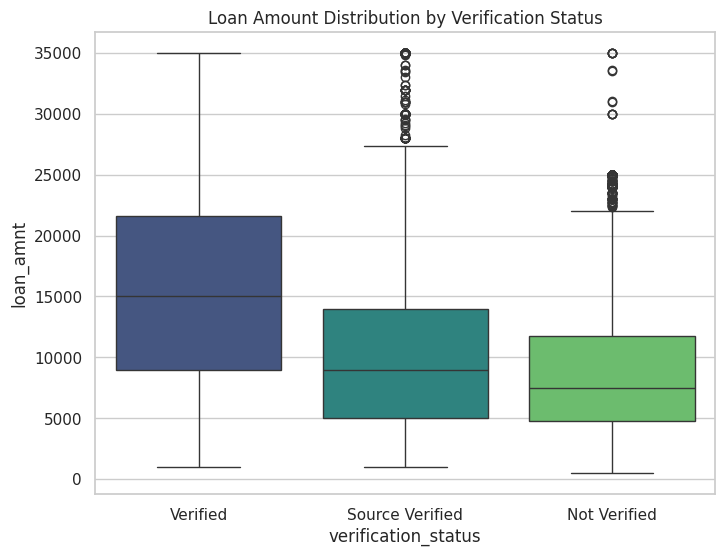

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='verification_status', y='loan_amnt', data=data, palette='viridis')
plt.title("Loan Amount Distribution by Verification Status")
plt.show()

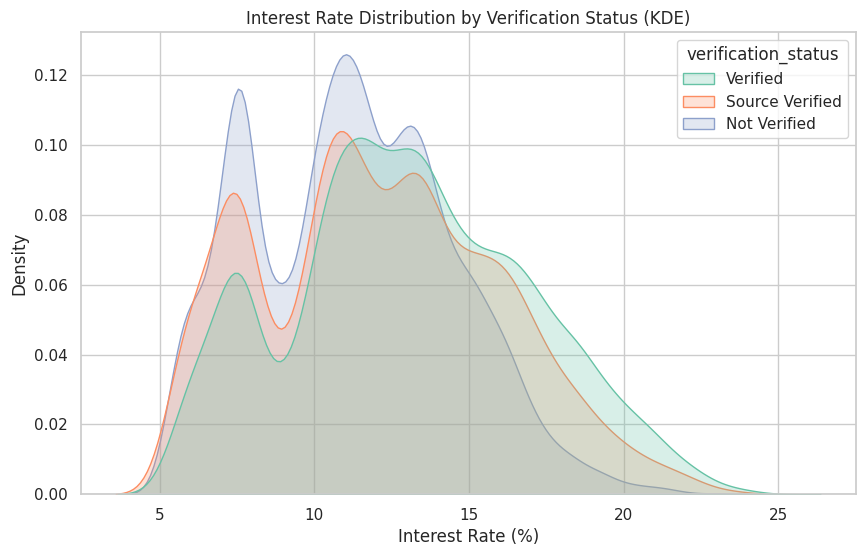

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.kdeplot(data=data, x='int_rate', hue='verification_status', fill=True, common_norm=False, palette='Set2')
plt.title("Interest Rate Distribution by Verification Status (KDE)")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Density")
plt.show()

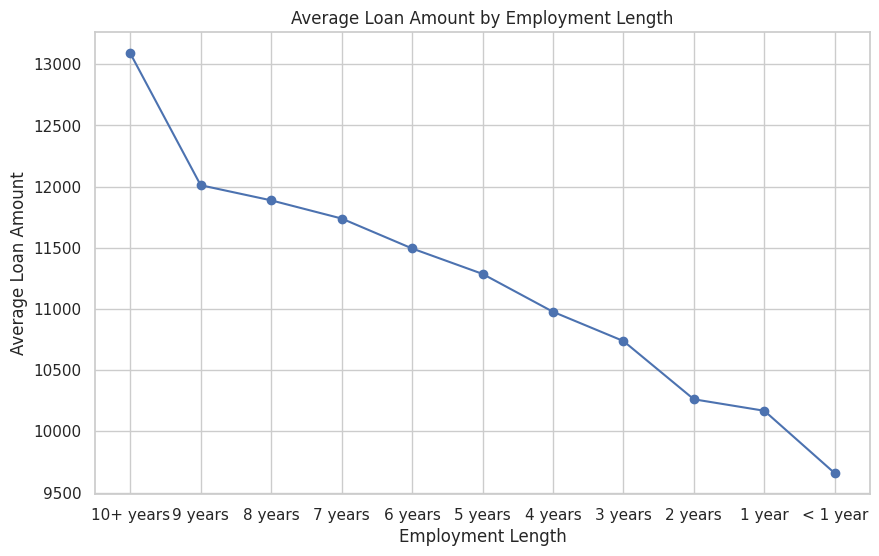

In [86]:
avg_loan_by_emp_length = data.groupby('emp_length')['loan_amnt'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
plt.plot(avg_loan_by_emp_length.index, avg_loan_by_emp_length.values, marker='o', linestyle='-')
plt.title('Average Loan Amount by Employment Length')
plt.xlabel('Employment Length')
plt.ylabel('Average Loan Amount')
plt.show()

Average Loan Amount by Zip Code (Top 10):
zip_code
834xx    25000.000000
556xx    25000.000000
248xx    24250.000000
465xx    22550.000000
743xx    21725.000000
845xx    21000.000000
739xx    21000.000000
623xx    20550.000000
247xx    20433.333333
266xx    20000.000000
Name: loan_amnt, dtype: float64


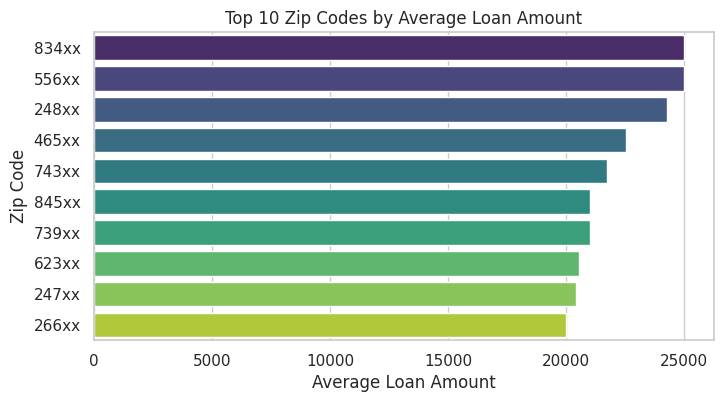

In [93]:
# Group by 'zip_code' and calculate average loan amount
avg_loan_by_zip_code = data.groupby('zip_code')['loan_amnt'].mean().sort_values(ascending=False)

print("Average Loan Amount by Zip Code (Top 10):")
print(avg_loan_by_zip_code.head(10))

# Plot the top 10 zip codes with the highest average loan amount
top_zip_codes = avg_loan_by_zip_code.head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_zip_codes.values, y=top_zip_codes.index, palette='viridis')
plt.title('Top 10 Zip Codes by Average Loan Amount')
plt.xlabel('Average Loan Amount')
plt.ylabel('Zip Code')

plt.show()


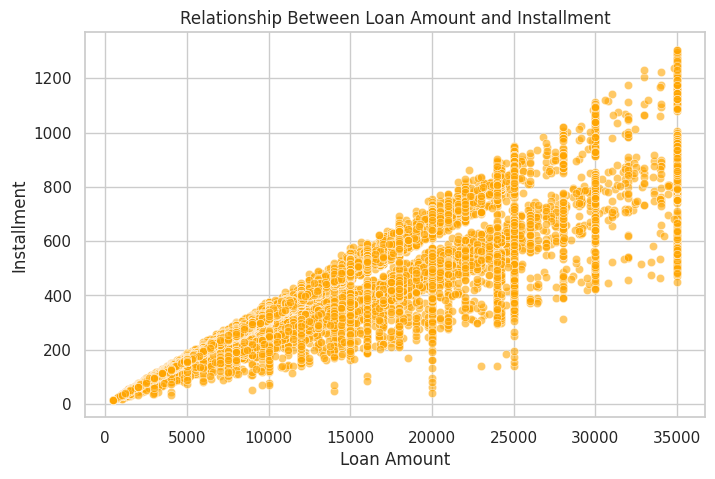

In [98]:
# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 5))
sns.scatterplot(x='loan_amnt', y='installment', data=data, alpha=0.6, color='orange')
plt.title('Relationship Between Loan Amount and Installment')
plt.xlabel('Loan Amount')
plt.ylabel('Installment')
plt.show()
